In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"winequality-white.csv",sep = ";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
#sns.pairplot(df)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

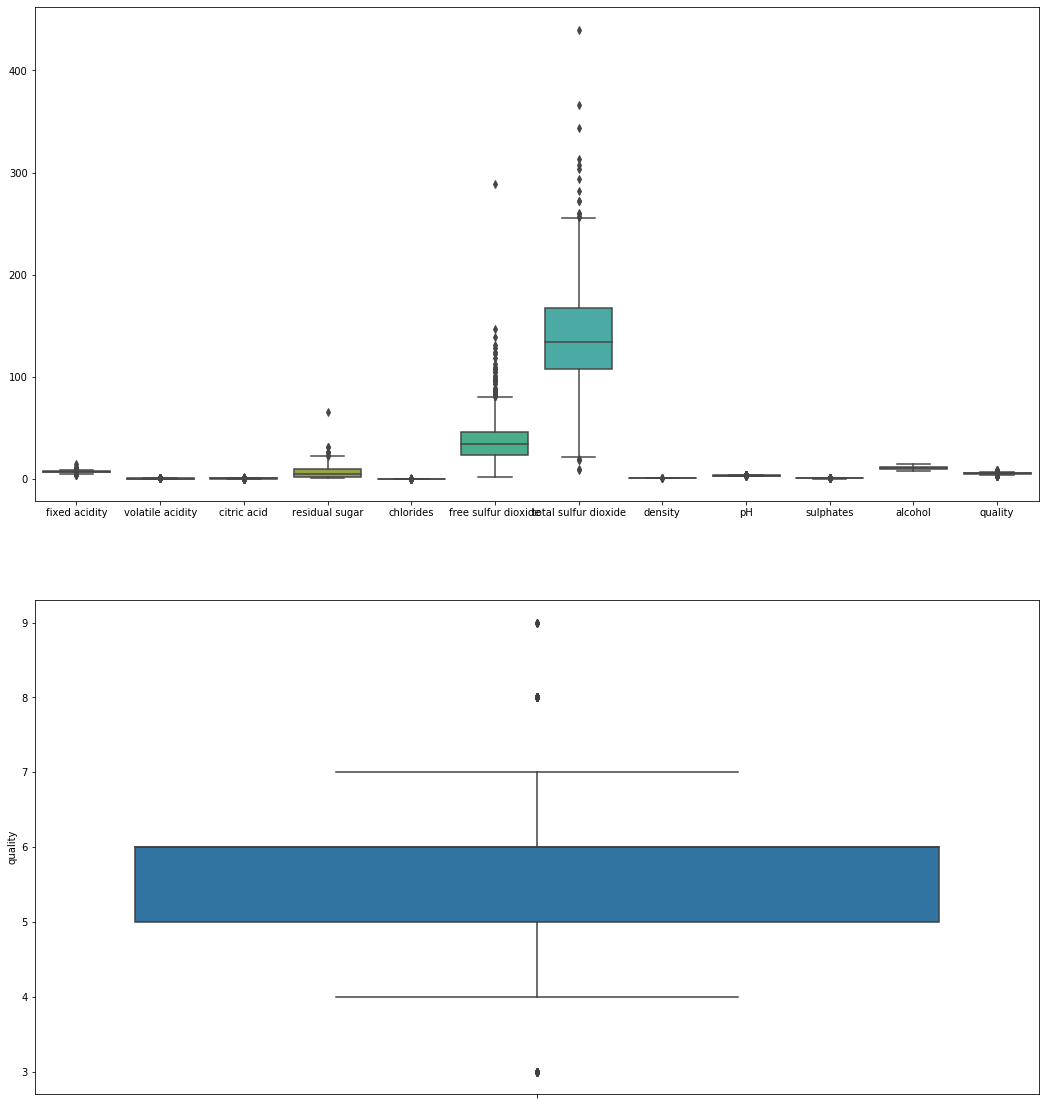

In [36]:
fig,axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18,20)
sns.boxplot(data=df,orient='v',ax=axes[0])
sns.boxplot(data=df,y='quality',orient='pH',ax=axes[1])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.model_selection import train_test_split

In [198]:
y =df['quality']
X =df.drop(['quality'],axis=1)


In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [200]:
from sklearn.preprocessing import StandardScaler

scalerd = StandardScaler()

X_train = scalerd.fit_transform(X_train)
X_test  = scalerd.fit_transform(X_test)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

ypred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("R squared {}".format(r2_score(y_test,ypred)))

Mean squared error 0.5543109104568756
R squared 0.2658446381896823


In [214]:
from sklearn.tree import DecisionTreeRegressor

DC = DecisionTreeRegressor(max_depth=4)

model = DC.fit(X_train,y_train)

ypred = model.predict(X_test)

ypred_train = model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("Test R squared {}".format(r2_score(y_test,ypred)))

print("Train R squared {}".format(r2_score(y_train,ypred_train)))

Mean squared error 0.5438870189532101
Test R squared 0.279650528880229
Train R squared 0.32498538920776965


In [209]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=4,min_samples_leaf=8,min_samples_split=4)

model = RF.fit(X_train,y_train)

ypred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("R squared {}".format(r2_score(y_test,ypred)))

Mean squared error 0.5126013599130043
R squared 0.3210867227180977


C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


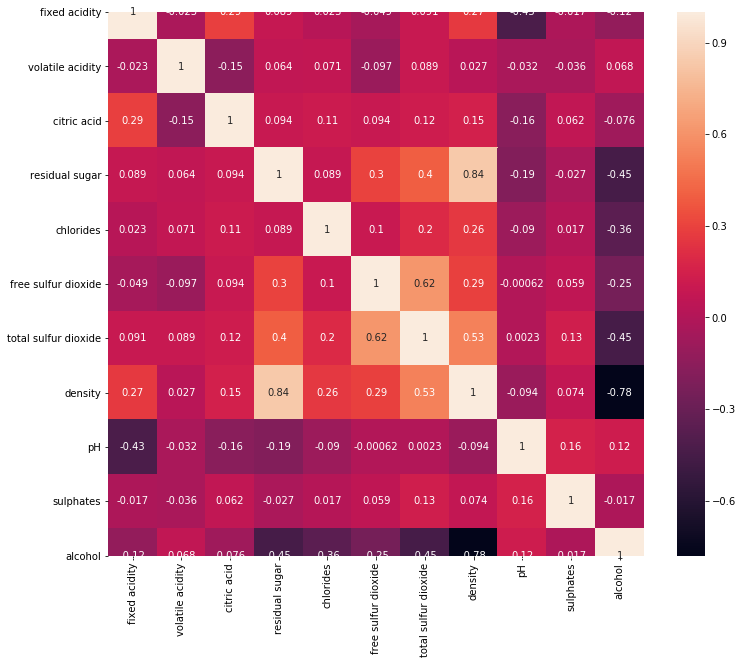

In [161]:
correl = X.corr()

plt.figure(figsize =(12,10))
sns.heatmap(correl,annot=True)

In [162]:
print(linreg.coef_)

[ 0.04430244 -0.19585345 -0.01028254  0.38419647  0.00621088  0.07779055
 -0.00716844 -0.3980337   0.09688552  0.07841953  0.27821761]


In [163]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [215]:
y =df['quality']
#X = df[['volatile acidity','alcohol','volatile acidity',]]
X =df.drop(['quality',"fixed acidity",'total sulfur dioxide',],axis=1)
#X =df.drop(['quality','pH',"fixed acidity","residual sugar",'density'],axis=1)

In [216]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [217]:
from sklearn.preprocessing import StandardScaler

scalerd = StandardScaler()

X_train = scalerd.fit_transform(X_train)
X_test  = scalerd.fit_transform(X_test)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

ypred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("R squared {}".format(r2_score(y_test,ypred)))

Mean squared error 0.5564205703793891
R squared 0.26305050566497146


In [218]:
from sklearn.tree import DecisionTreeRegressor

DC = DecisionTreeRegressor(max_depth=4)

model = DC.fit(X_train,y_train)

ypred = model.predict(X_test)

ypred_train = model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("Test R squared {}".format(r2_score(y_test,ypred)))

print("Train R squared {}".format(r2_score(y_train,ypred_train)))

Mean squared error 0.5451609081705845
Test R squared 0.27796333026723963
Train R squared 0.3225558066548776


In [221]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=4,min_samples_leaf=8,min_samples_split=4,n_estimators=60)

model = RF.fit(X_train,y_train)

ypred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error {}".format(mean_squared_error(y_test,ypred)))

print("R squared {}".format(r2_score(y_test,ypred)))

Mean squared error 0.5110105909404886
R squared 0.3231936117374953


In [193]:
y_test.head()

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

In [194]:
ypred[:5]

array([5.98298092, 6.20357993, 6.46698823, 5.91747725, 6.25517533])

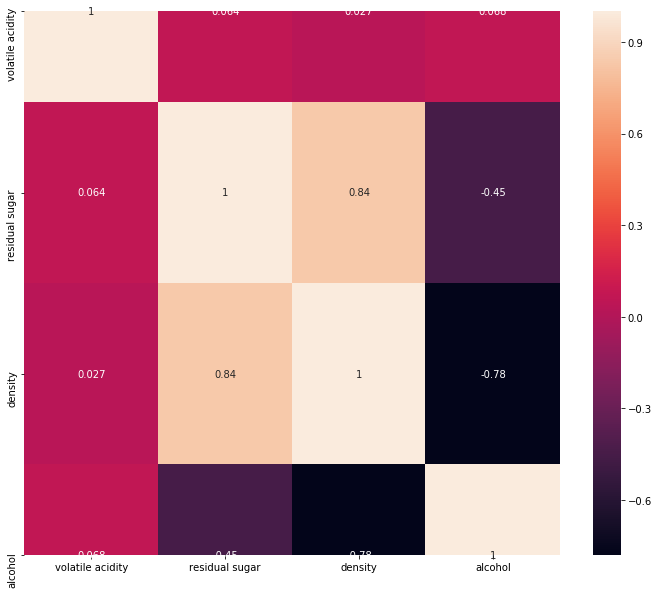

In [169]:
correl = X.corr()

plt.figure(figsize =(12,10))
sns.heatmap(correl,annot=True)